# BRFSS Datset Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Data Dictionary](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)

In [2]:
# Take in the data
df = pd.read_csv("BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## EDA

In [3]:
# See the types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
for col in df.columns:
    print(col, "\n", df[col].unique(), "\n")

HeartDiseaseorAttack 
 [0. 1.] 

HighBP 
 [1. 0.] 

HighChol 
 [1. 0.] 

CholCheck 
 [1. 0.] 

BMI 
 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.] 

Smoker 
 [1. 0.] 

Stroke 
 [0. 1.] 

Diabetes 
 [0. 2. 1.] 

PhysActivity 
 [0. 1.] 

Fruits 
 [0. 1.] 

Veggies 
 [1. 0.] 

HvyAlcoholConsump 
 [0. 1.] 

AnyHealthcare 
 [1. 0.] 

NoDocbcCost 
 [0. 1.] 

GenHlth 
 [5. 3. 2. 4. 1.] 

MentHlth 
 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.] 

PhysHlth 
 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.] 

DiffWalk 
 [1. 0.] 

Sex 
 [0. 1.] 

Age

Looks like the data has already been cleaned, so EDA is not neccessary. 

### Define a distribution function

In [5]:
def plot_dist(col, name):
    sns.set(style="whitegrid")  # Set the style for the plot

    # Create the distribution plot
    sns.histplot(df[col], kde=True, color='skyblue')

    # Set plot labels and title
    plt.xlabel(name + "s")
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + name)

    # Show the plot
    plt.show()

### Plot the distribution of some variables

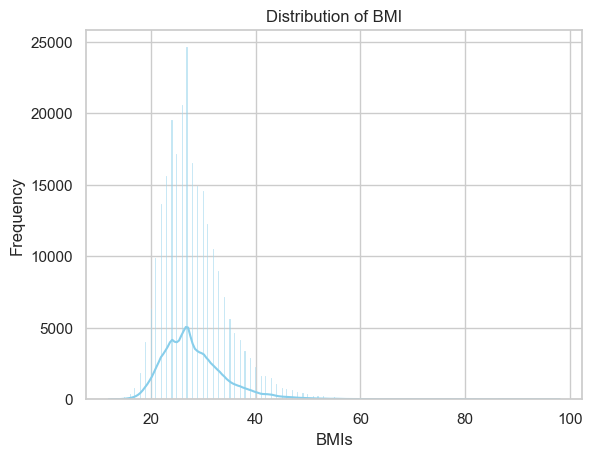

In [6]:
plot_dist("BMI", "BMI")

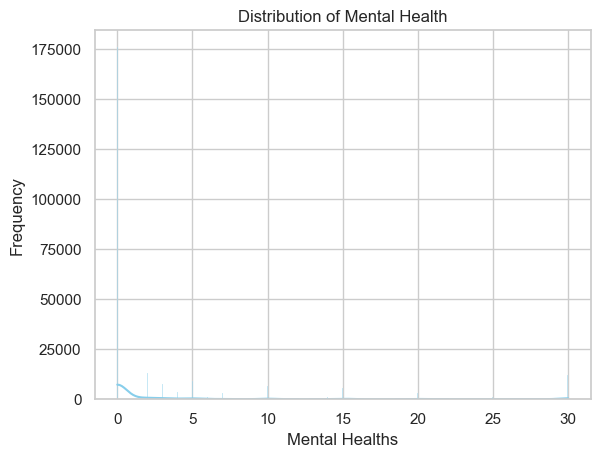

In [7]:
plot_dist("MentHlth", "Mental Health")

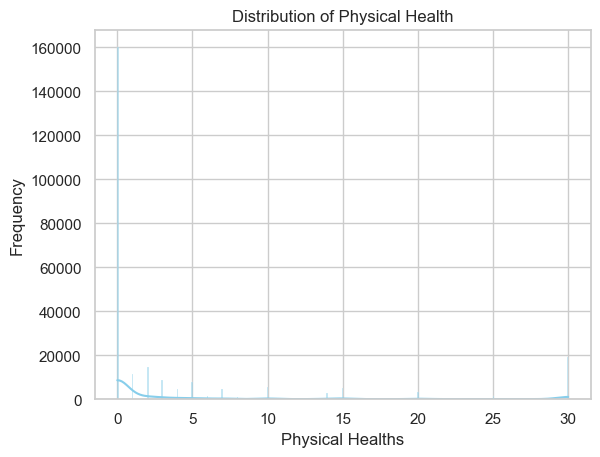

In [8]:
plot_dist("PhysHlth", "Physical Health")

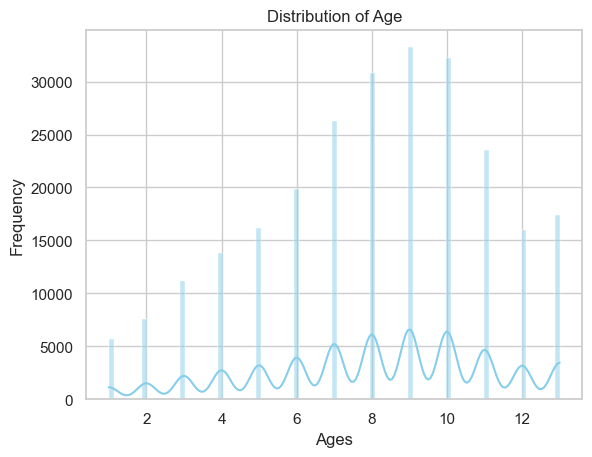

In [9]:
plot_dist("Age", "Age")

## Model Creation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [11]:
numerical_features = [
    "BMI",
    "MentHlth",
    "PhysHlth",
    "Age",
]

categorical_features = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "Diabetes",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
    "Education",
    "Income",
]

features = numerical_features + categorical_features

target = "HeartDiseaseorAttack"

In [12]:
# Split the features into test and train datasets

# input features (X) and target (y)
X = df[features]
y = df[target]

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y
                                                   )

### k-NN Algorithm

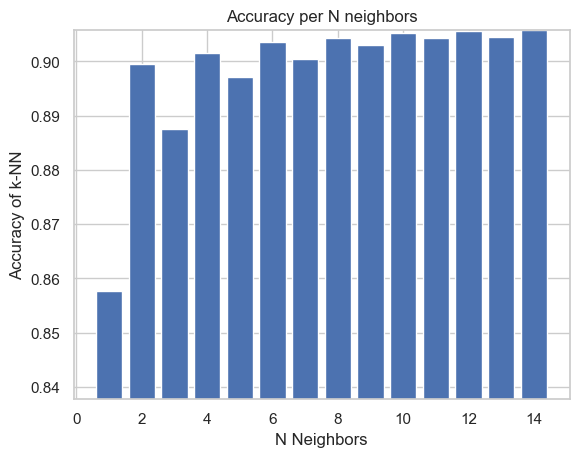

In [24]:
# Hyper Parameter Tuning (Different n_neighbors)
n_range = list(range(1, 15))
accuracy = []
for n in n_range:
    # Instantiate the Model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
    
# Create a visualization
fig, ax = plt.subplots()

ax.bar(n_range, accuracy)
ax.set_xlabel("N Neighbors")
ax.set_ylabel("Accuracy of k-NN")
ax.set_title("Accuracy per N neighbors")
plt.ylim(min(accuracy) - 0.02, max(accuracy))

plt.show()

### Random Forest Algorithm

In [23]:
# Model Creation
for n in range(100, 210, 20):
    rf = RandomForestClassifier(n_estimators=n,
                                random_state=42)
    rf.fit(X_train, y_train)
    # Make predictions for the test set
    y_pred_test = rf.predict(X_test)
    # View accuracy score
    print(f'{n}: Accuracy: {round(accuracy_score(y_test, y_pred_test), 4)}')

100: Accuracy: 0.9025
120: Accuracy: 0.9019
140: Accuracy: 0.9021
160: Accuracy: 0.9022
180: Accuracy: 0.9022
200: Accuracy: 0.9022


### Support Vector Machine

In [ ]:
# Instantiate the Model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the prediction accuracy
print(f"The accuracy of SVM: {svm.score(X_test, y_test):.3f}")

### Naive Bayes

In [14]:
# Instantiate the model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Evaluate the prediction accuracy
print(f"The accuracy of Naive Bayes: {round(gaussian.score(X_test, y_test) * 100, 2)}")

The accuracy of Naive Bayes: 79.6


### Quadratic Discriminant Analysis

In [16]:
# Insantiate the model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Evaluate the prediction accuracy
print(f"The accuracy of QDA: {round(qda.score(X_test, y_test) * 100, 2)}")

The accuracy of QDA: 79.5


### Decision Tree

In [22]:
# Insantiate the model
for depth in range(2, 13):
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    # Evaluate the prediction accuracy
    print(f"The accuracy of QDA with max depth {depth}: {round(dt.score(X_test, y_test) * 100, 2)}")

The accuracy of QDA with max depth 2: 90.58
The accuracy of QDA with max depth 3: 90.66
The accuracy of QDA with max depth 4: 90.67
The accuracy of QDA with max depth 5: 90.68
The accuracy of QDA with max depth 6: 90.64
The accuracy of QDA with max depth 7: 90.63
The accuracy of QDA with max depth 8: 90.62
The accuracy of QDA with max depth 9: 90.58
The accuracy of QDA with max depth 10: 90.49
The accuracy of QDA with max depth 11: 90.25
The accuracy of QDA with max depth 12: 90.06
